In [1]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

**Задание 2:**

У Вас есть данные о продажах продукции определенного сегмента в штуках за последний год с разбивкой по менеджерам с привязкой к командам.


Делаем предположение, что все территории менеджеров, за которые они несут ответственность, равны.

**Задача:**

Проанализируйте и сделайте выводы о результатах работы менеджеров и команд в 3 квартале, целиком и/или помесячно.
Исходите из того, что Ваш отчет будет дан в работу менеджеру, курирующему представленный регион.
Необходимо, чтобы Ваши данные были удобными к восприятию даже для человека, у которого не было времени погрузиться в массив данных, либо для человека, который не привык работать с большими данными и ему нужно в простой и понятной форме понять что такое «хорошо» и что такое «плохо».


In [2]:
# загрузим исходные таблицы в датасет
df = pd.read_csv(r'D:\pandas\Test sales analysis\Задание 2.csv', index_col=0, sep=';')

In [3]:
# предобработка данных (удаление лишнего пробела и преобразование к числовому типу данных)
df = df.replace(r'\s+','',regex=True)
df = df.astype(int)

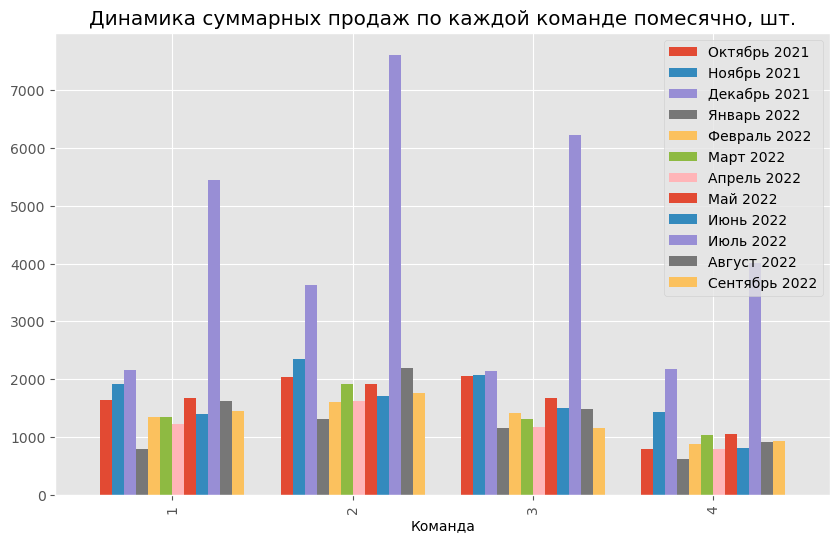

In [4]:
plt.style.use('ggplot')
df.groupby("Команда").sum().plot(kind='bar', figsize=(10 , 6), width=0.8);
plt.title('Динамика суммарных продаж по каждой команде помесячно, шт.');

**Комментарий к графику.**

В июле 2022г. в каждой команде отмечается тенденция к значительному увеличению количества продаж.

В январе 2022 г., наоборот, наблюдается спад.

In [5]:
# вспомогательная сводная таблица по кварталам
df_quarter = df.loc[:, 'Октябрь 2021':'Декабрь 2021'].sum(axis=1)
df_quarter = pd.DataFrame(df_quarter, columns=['4 квартал 21'])
df_quarter['1 квартал 22'] = df.loc[:, 'Январь 2022':'Март 2022'].sum(axis=1)
df_quarter['2 квартал 22'] = df.loc[:, 'Апрель 2022':'Июнь 2022'].sum(axis=1)
df_quarter['3 квартал 22'] = df.loc[:, 'Июль 2022':'Сентябрь 2022'].sum(axis=1)
df_quarter['Команда'] = df['Команда']
df_quarter['среднее 4кв21-3кв22'] = df_quarter.loc[:, :'2 квартал 22'].mean(axis=1)
df_quarter['изменение 3кв относит среднего'] = (df_quarter['3 квартал 22'] - df_quarter['среднее 4кв21-3кв22'])/df_quarter['среднее 4кв21-3кв22']

<Figure size 1000x600 with 0 Axes>

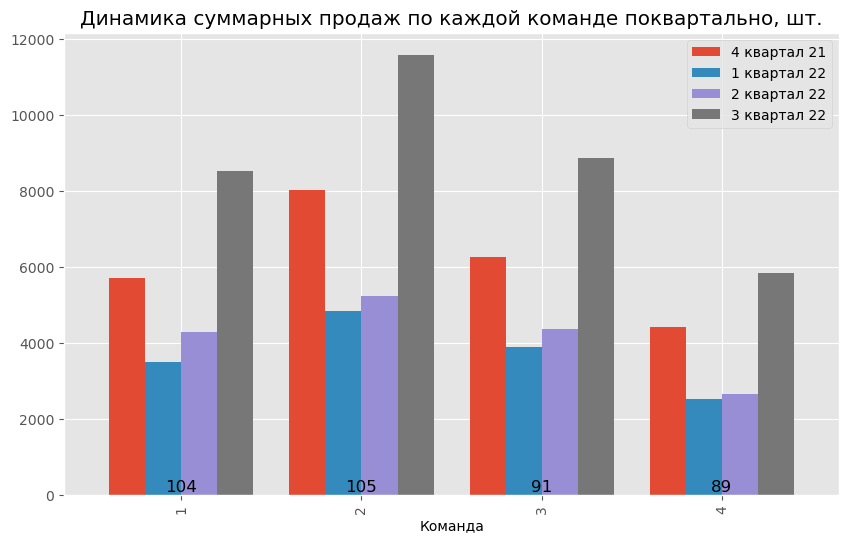

In [6]:
plt.style.use('ggplot');
plt.figure(figsize=(10,6));
df_quarter.loc[:, :'Команда'].groupby("Команда").sum().plot(kind='bar', figsize=(10 , 6), width=0.8); 

for i, v in enumerate(df_quarter.groupby("Команда")['изменение 3кв относит среднего'].mean()):
    plt.text(i, v, int(round(v*100, 0)), ha='center', va='bottom', size='large') 
    
plt.title('Динамика суммарных продаж по каждой команде поквартально, шт.');

**Комментарий к графику.**

В 3кв. 2022г. в каждой команде отмечается тенденция к увеличению количества продаж. 

В каждой команде продажи в 3кв. выросли примерно в 2 раза, по сравнению с предыдущими кварталами этого года.

1 и 2 команды увеличили продажи в 3 квартале относительно своих средних продаж за предыдущие периоды на 104% и 105% соответственно.

3 и 4 команды - на 91 и 89% соответственно.

<Figure size 1000x600 with 0 Axes>

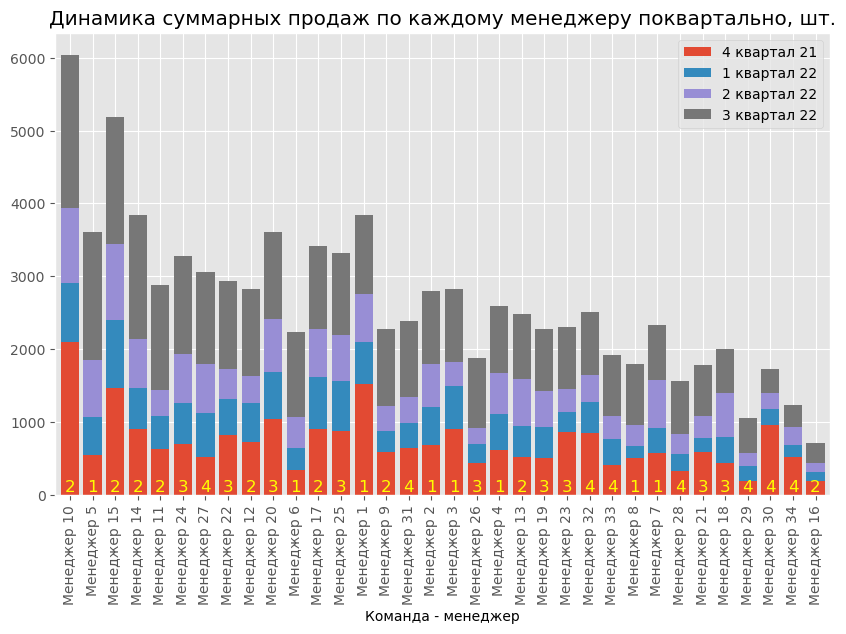

In [7]:
plt.style.use('ggplot');
plt.figure(figsize=(10,6));
df_quarter.sort_values(by=['3 квартал 22'], ascending=False, inplace=True);
df_quarter.loc[:, :'3 квартал 22'].plot(kind='bar', figsize=(10 , 6), stacked=True, width=0.8); 
for i, v in enumerate(df_quarter["Команда"]):
    plt.text(i, v, int(round(v, 0)), ha='center', va='bottom', size='large', color='yellow'); 
plt.title('Динамика суммарных продаж по каждому менеджеру поквартально, шт.');

**Комментарий к графику.**

На диаграмме все менеджеры расположены в порядке убывания кол-ва суммарных продаж за 3кв.
Желтые значения - номера команд, к которым относится менеджер.

Менеджер 10 показывает лучший результат по суммарным продажам за 3 квартал, а также лучший результат по суммарным продажам за 3 предыдущих квартала в целом. 

Менеджер 16 показывает худший результат среди всех менеджеров по суммарным продажам за 3 кв., а также за 3 предыдущих квартала. 

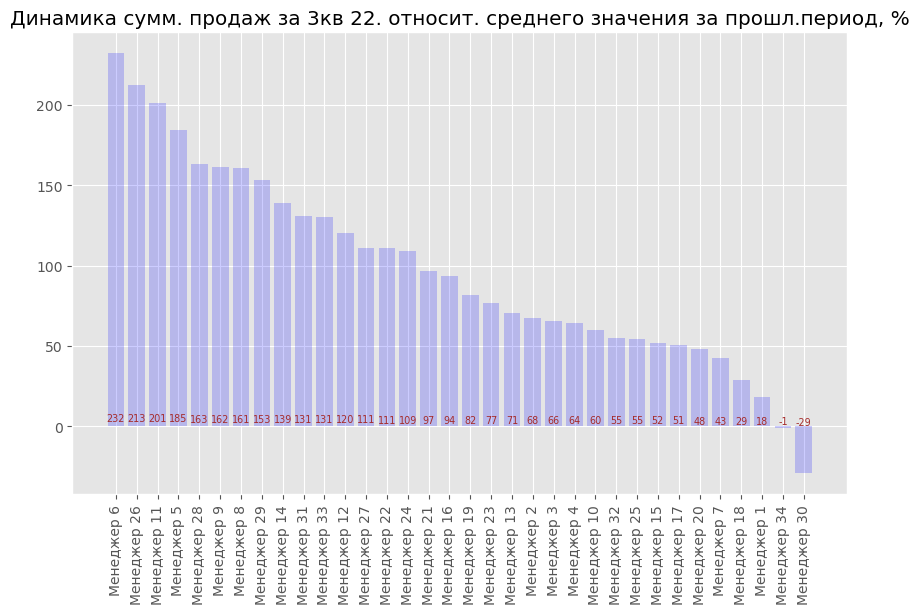

In [8]:
plt.style.use('ggplot');
plt.figure(figsize=(10,6));
df_quarter.sort_values(by=['изменение 3кв относит среднего'], ascending=False, inplace=True);

plt.bar(df_quarter.index, (df_quarter['изменение 3кв относит среднего']*100), width=0.8, color='blue', alpha=0.2)

for i, v in enumerate(df_quarter["изменение 3кв относит среднего"]):
    plt.text(i, v, int(round(v*100)), ha ='center', va='bottom', size='x-small', color='brown'); 
    
plt.title('Динамика сумм. продаж за 3кв 22. относит. среднего значения за прошл.период, %');
plt.xticks(rotation='vertical');

**Комментарий к графику.**

На диаграмме все менеджеры расположены в порядке убывания приращения суммарных продаж в 3кв относительно своего среднего значения за прошлые периоды (красные значения на диаграмме).

Прирост в 3 квартале 22г. более 200%  у менеджеров: 6, 26, 11.

Прирост в 3 квартале 22г. более 100%  у менеджеров: 5, 28, 9, 8, 29, 14, 31, 33, 12, 27, 22, 24.

Уменьшение продаж в 3 квартале у менеджеров: 34 и 30.